In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

Following set of data has been used

Oil price dataset from the U.S Energy Information administration.
Share price dataset from Yahoo Finance in a daily frequency from the following companies
Shell (RDSB.L)

BP British Petroleum(BP.L)

Cairn Energy (CNE.L)

Premier Oil (PMO.L)

Statoil (STL.OL)

TOTAL (FP.PA)

ENGIE (ENGI.PA)

Schlumberger (SLB.PA)

REPSOL (REP.MC)

#Loading data and introduction to feature engineering

The oil primary dataset includes a csv file 'RBERTd.csv' with oil price and date in a daily frequency.</br>
The stock data comes in the shape of a csv file with also daily frequency.

In [ ]:
# Read oil price and transform data

brent=pd.read_csv('RBERTd.csv') # Read Excel
brent.columns=['date','oil_price']
brent['date']=brent["date"].astype('datetime64[ns]')
brent.head()

,date,oil_price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7641 non-null   datetime64[ns]
 1   oil_price  7641 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 119.5 KB


In [ ]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv(shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


#Data Analysis

2.1 Simple line plot oil price

<Figure size 864x864 with 0 Axes>

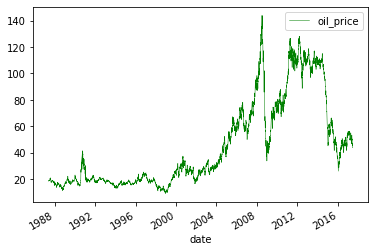

In [ ]:
plt.figure(figsize=(12,12))
brent[['date','oil_price']].set_index('date').plot(color="green", linewidth=0.5) 

2.2 Pairplot on **BP(British Petroleum)** share price from years 2000 to 2017 using a color gradient for different years

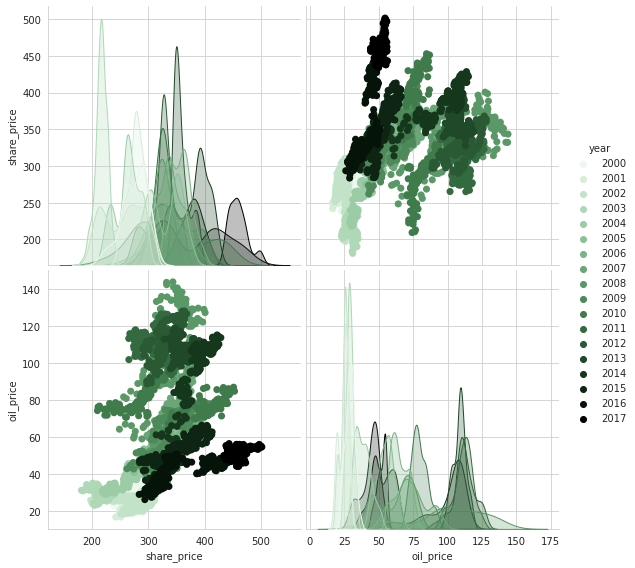

In [ ]:
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))


2.3 Pairplot on BP share price using last five years</br>
Pairplot on less data 2013 to 2017 using **Royal Dutch Shell (LON) stock price**


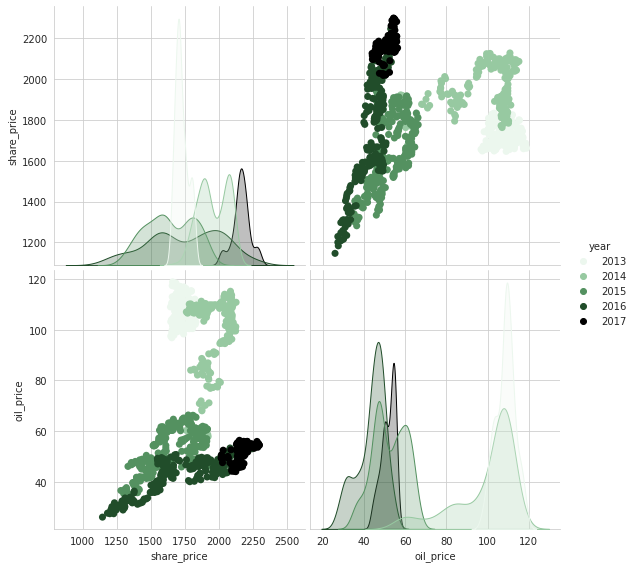

In [ ]:

# Just for the last 5 years
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

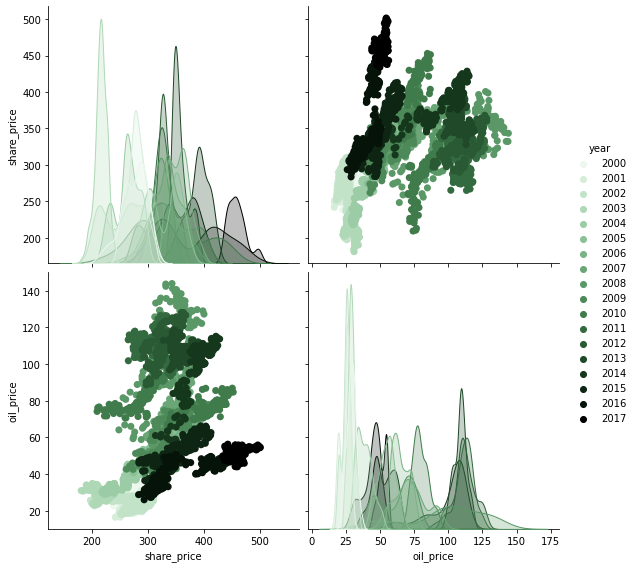

In [ ]:
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

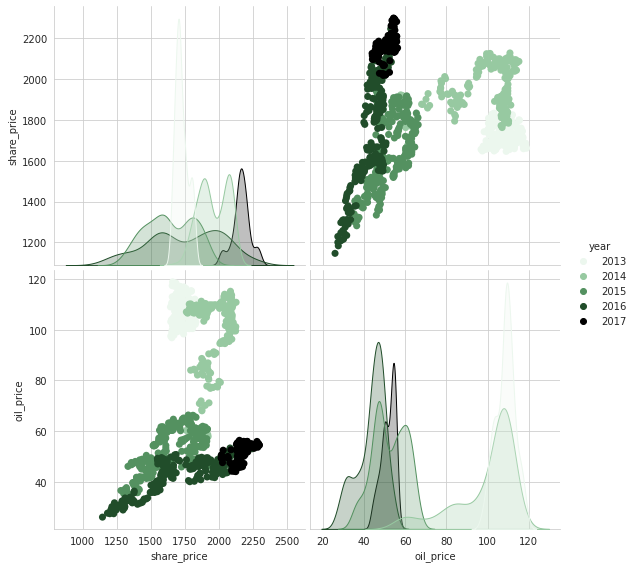

In [ ]:
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

2.4.- Violin plot of the oil price

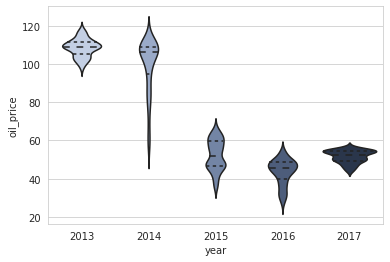

In [ ]:
sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)

sns.violinplot(x="year", y="oil_price", data=all_data13[all_data13['name']=="RDSB.L"],
               inner="quart", palette=palette, trim=True)

2.5 Violin plot of the share price of several Oil and Gas companies

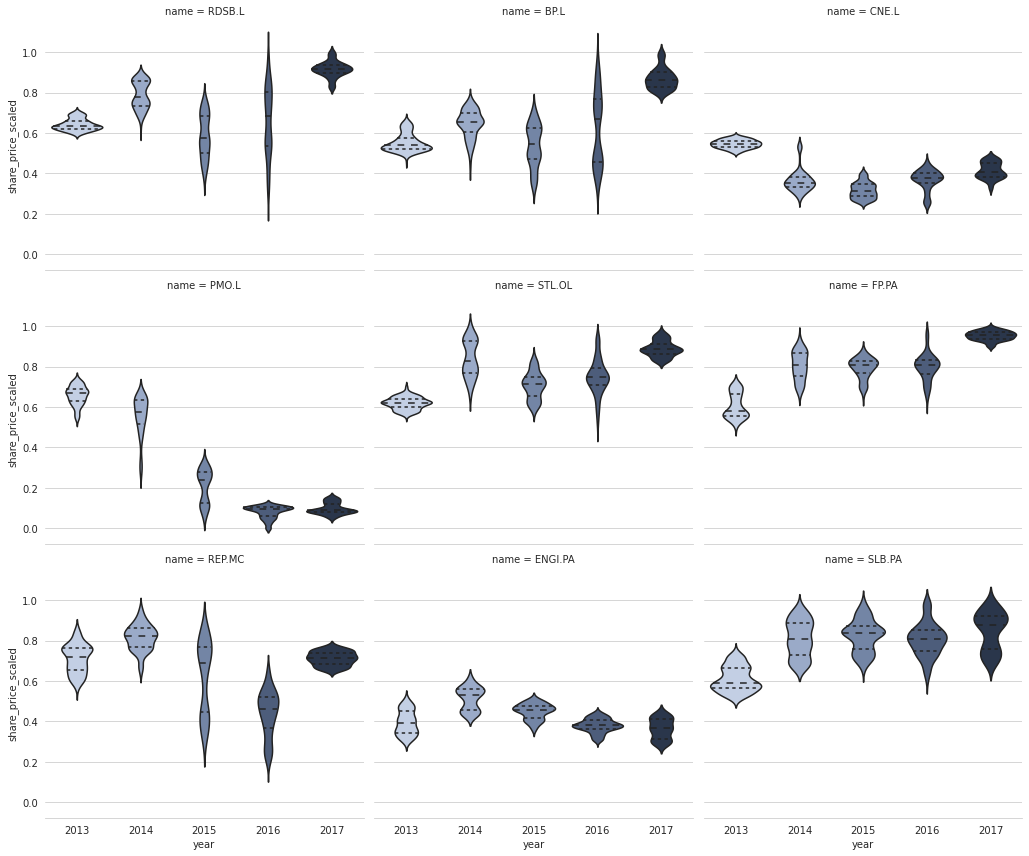

In [ ]:
# Violin Plot Oil price on last 5 years
#==============================================================================

sns.factorplot(x="year", y="share_price_scaled", col='name', col_wrap=3,kind="violin",
               split=True, data=all_data13,inner="quart", palette=palette, trim=True,size=4,aspect=1.2)
sns.despine(left=True)

2.6.- Jointplot comparison of Premier Oil and Statoi

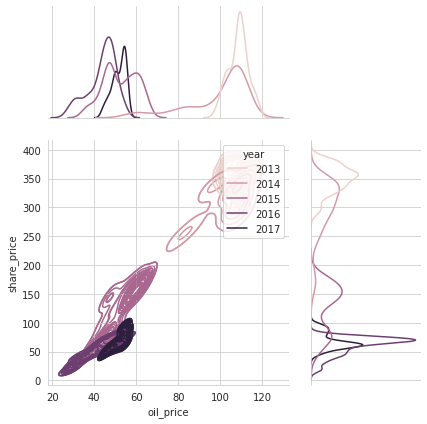

In [ ]:
# joint plot using 5 years for Premier Oil
#==============================================================================

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="PMO.L"],kind="kde",
              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

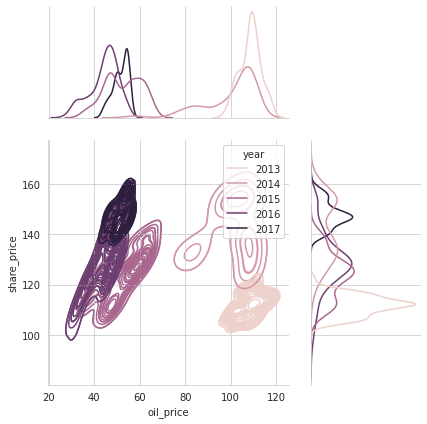

In [ ]:
#==============================================================================
# joint plot using 5 years for Statoil
#==============================================================================

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="STL.OL"],kind="kde",
              hue="year",size=6,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

2.7.- Plot of oil price vs share price of different companies using different template

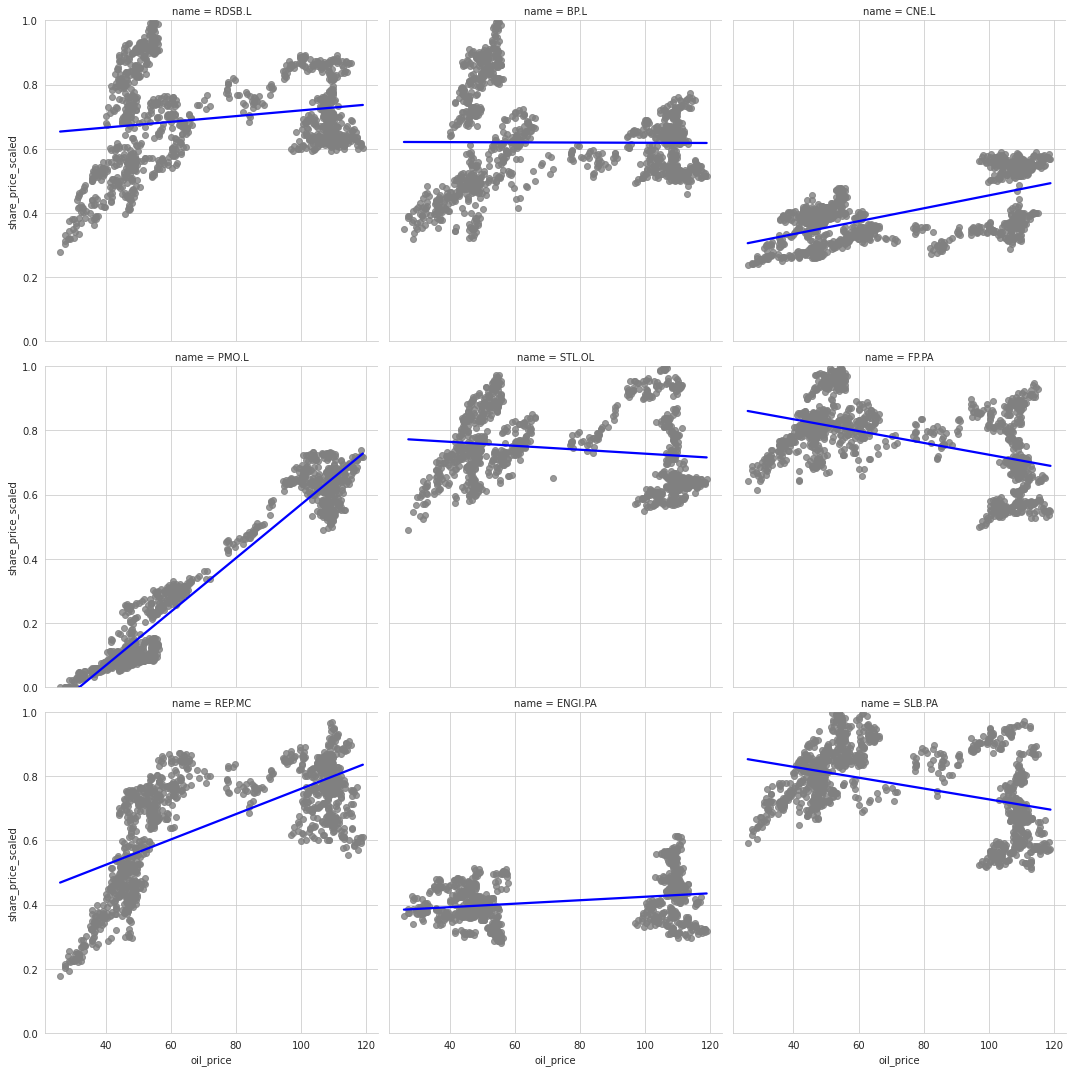

In [ ]:
# lmplot using using 5 years for all companies
#==============================================================================

sns.lmplot(x="oil_price", y="share_price_scaled", col="name",ci=None, col_wrap=3, 
           data=all_data13, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))

We dont really see that much on that chart. Lets add different colors for each year and see if correlations are telling us anything.

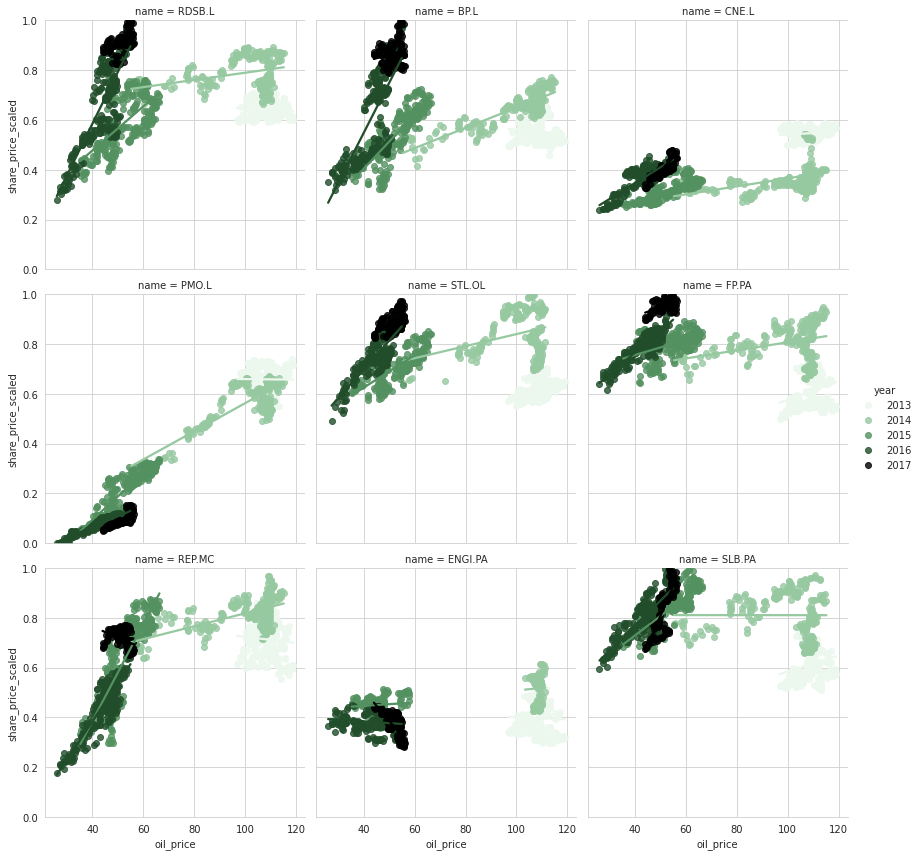

In [ ]:
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13, order=1,palette=palette,size=4).set(ylim=(0, 1))

#3.- Machine Learning and Prediction

3.1.- Cluster analysis on Shell data

In the following example we will divide the data from Royal Dutch Shell into 6 groups using cluster analysis.

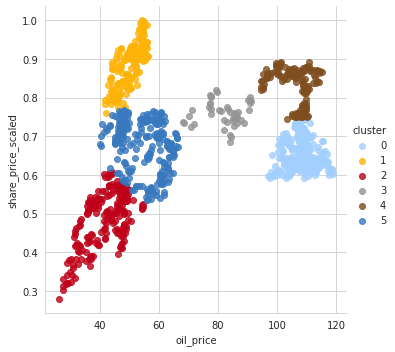

In [ ]:
# Unsupervised Learning - Cluster analysis on Shell data
#==============================================================================
from sklearn.cluster import KMeans

shell=pd.DataFrame()
shell=all_data13[all_data13['name']=="RDSB.L"]
# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
shell["oil_price_scaled"]=scaler.fit_transform(shell["oil_price"].to_frame())
shell["cluster"] = KMeans(n_clusters=6, random_state=1).fit_predict(shell[["share_price_scaled","oil_price_scaled"]])

# The 954 most common RGB monitor colors https://xkcd.com/color/rgb/
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="oil_price", y="share_price_scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=shell)

3.2.- Linear regression on Royal Dutch Shell share price vs oil pric

In [ ]:
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# 1.- Data preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )] # Extract data from years 2016/17
shell15=shell15[["share_price","oil_price"]].reset_index()

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = shell15[:-100]
test = shell15[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  35.25408169124279
Mean squared error: 23210.67


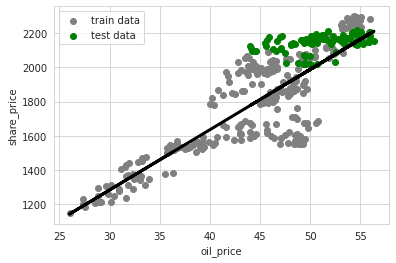

In [ ]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.plot(x_train, regr.predict(x_train), color='black', linewidth=3)
plt.plot(x_test,regr.predict(x_test),  color='black', linewidth=3)
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

In top of the oil price, we are going to use other variables to predict the share price of Shell. These are going to be the prices of Premier Oil, Cairn Energy, TOTAL and ENGIE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )]
shell15=shell15[["share_price","oil_price"]].reset_index()

# Load share price of other variables
shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-373:].reset_index()['share_price']
shell15['CNE.L']=all_data13[(all_data13['name']=="CNE.L")][-373:].reset_index()['share_price']
shell15['FP.PA']=all_data13[(all_data13['name']=="FP.PA")][-373:].reset_index()['share_price']
shell15['ENGI.PA']=all_data13[(all_data13['name']=="ENGI.PA")][-373:].reset_index()['share_price']

train = shell15[:-100]
test = shell15[-100:]

x_train=train[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]
y_train=train['share_price']

x_test=test[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

In [ ]:
train

,index,share_price,oil_price,PMO.L,CNE.L,FP.PA,ENGI.PA
0,3997,1380.015015,36.28,48.75,160.399994,36.617168,13.988590
1,3998,1377.323120,35.56,47.50,154.699997,35.728664,13.805294
2,3999,1349.507446,33.89,47.00,146.800003,34.389011,13.456586
3,4000,1311.821655,33.57,48.50,141.500000,34.389011,13.461056
4,4001,1234.207153,31.67,46.00,137.800003,34.296947,13.519175
...,...,...,...,...,...,...,...
268,4266,2223.634766,54.34,91.75,239.899994,46.559238,10.990517
269,4267,2209.132813,55.89,93.50,242.000000,45.999165,10.831444
270,4268,2210.099609,54.80,94.25,238.000000,45.492664,10.633807
271,4269,2171.427734,54.77,90.25,229.000000,45.448830,10.667550


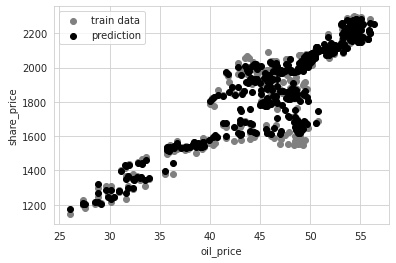

In [ ]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_pred=plt.scatter(shell15["oil_price"], regressor.predict(shell15[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]),  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

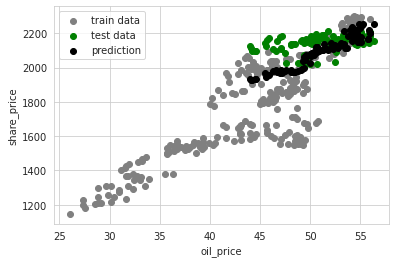

In [ ]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_test=plt.scatter(x_test["oil_price"],y_test,   color='green')
plt_pred=plt.scatter(x_test["oil_price"], y_pred,  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"% np.mean((regressor.predict(x_train) - y_train) ** 2))

Mean squared error: 2535.07


Feature ranking:
Feature oil_price (0.209033)
Feature PMO.L (0.036463)
Feature CNE.L (0.121288)
Feature FP.PA (0.547962)
Feature ENGI.PA (0.085253)


Text(0, 0.5, 'Importance')

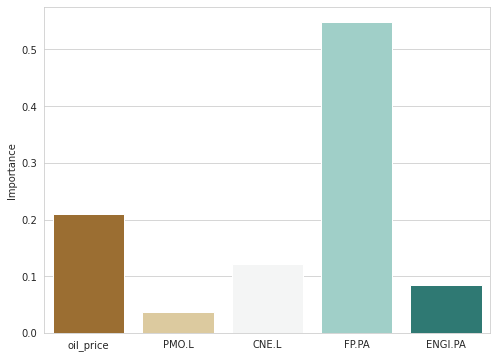

In [ ]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")